Objective
Apply Q-learning on a discrete Gymnasium environment to train an agent that maximizes rewards.
Requirements
1. Install dependencies:
○ pip install gymnasium numpy matplotlib
2. Choose any discrete Gymnasium environment.
3. Implement Q-learning:
○ Initialize Q-table.
○ Use ε-greedy exploration.
○ Update Q-values: Q(s,a)←Q(s,a)+α[r+γmax a′Q(s′,a′)−Q(s,a)]
4. Train and evaluate the agent.
5. Plot learning curve (rewards vs episodes) and simulate the same

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

In [2]:
# Part 1 : Choose the Taxi-v3 discrete environment and initialize all parameters
env = gym.make('Taxi-v3',render_mode='rgb_array')
state_space_size = env.observation_space.n
action_space_size = env.action_space.n

# initialize q-table with null matrix of appropriate size
q_states_table = np.zeros((state_space_size,action_space_size))

# iniitalize all hyperparameters

learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay_rate = 0.999
min_epsilon = 0.01

# initialize all training parameters

episodes = 25000
rewards_per_episodes = []


In [3]:
# Part 2 : Training the agent to learn

for episode in range(episodes):
  state, info = env.reset()
  terminated = False
  truncated = False
  total_rewards = 0

  while not terminated and not truncated:

    # use epsilon-greedy strategy to train
    if np.random.random() < epsilon:
      # explore by taking a random action
      action = env.action_space.sample()
    else:
      # choose the best explored action
      action = np.argmax(q_states_table[state,:])


    # now take action and observe the outcome
    new_state , reward , terminated , truncated , info = env.step(action)

    total_rewards += reward

    # update Q-table using Q-learning formula
    q_states_table[state,action] = q_states_table[state,action] + learning_rate*(reward + discount_factor*np.max(q_states_table[new_state,:]) - q_states_table[state,action])
    state = new_state

  # decay the epsilon

  epsilon = max(min_epsilon, epsilon*epsilon_decay_rate)
  rewards_per_episodes.append(total_rewards)



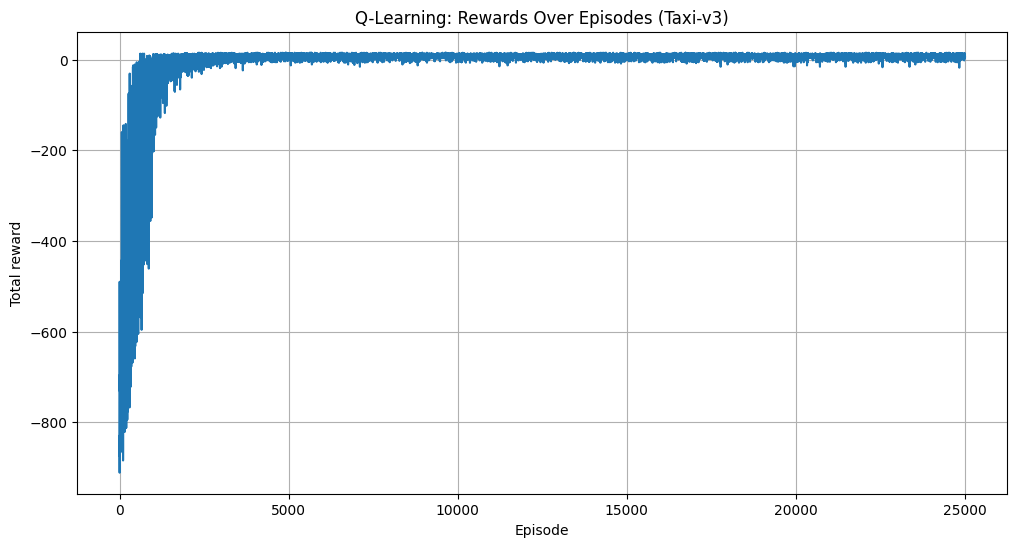

In [4]:
# Part 3 : Plotting the learning curve

plt.figure(figsize=(12,6))
plt.plot(rewards_per_episodes)
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.title("Q-Learning: Rewards Over Episodes (Taxi-v3)")
plt.grid(True)
plt.show()

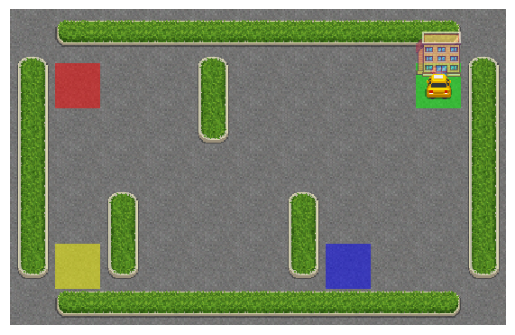

In [6]:
# Part 4 : Simulating the trained agent

from IPython.display import clear_output
import time

print("\nSimualtion of trained agent: \n")
# Simulation of 3 episodes
for i in range(3):
  states , info = env.reset()
  terminated = False
  truncated = False
  print(f"Episode {i+1}: \n")
  while not terminated and not truncated:
    # use the learned policy for exploitation

    action = np.argmax(q_states_table[state,:])
    new_state , reward , terminated , truncated , info = env.step(action)
    print(f"State: {state} --->  Action: {action} ---> New State: {new_state}  ,   Reward: {reward} ")

    frame = env.render()

    plt.imshow(frame)
    plt.axis('off')
    clear_output(wait=True)
    plt.show()
    time.sleep(0.3)



    state = new_state


env.close()
